# Importing Libraries 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats as st
import math

In [37]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [38]:
link="https://drive.google.com/file/d/1hLRpPHO3Zg2hOUL0uw2yMJ6Thyy8pvtv/view?usp=share_link"
id = link.split('/')[-2]
print (id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('media prediction and its cost.csv')  
data = pd.read_csv("media prediction and its cost.csv")


1hLRpPHO3Zg2hOUL0uw2yMJ6Thyy8pvtv


In [39]:
np.random.seed(41)
data.head().T

0                      1  \
food_category                   Breakfast Foods        Breakfast Foods   
food_department                    Frozen Foods           Frozen Foods   
food_family                                Food                   Food   
store_sales(in millions)                   7.36                   5.52   
store_cost(in millions)                  2.7232                 2.5944   
unit_sales(in millions)                     4.0                    3.0   
promotion_name                     Bag Stuffers  Cash Register Lottery   
sales_country                               USA                    USA   
marital_status                                M                      M   
gender                                        F                      M   
total_children                              1.0                    0.0   
education                   Partial High School       Bachelors Degree   
member_card                              Normal                 Silver   
occupation                       Skilled Manual           Professional   
houseowner                                    Y                      Y   
avg_cars_at home(approx)                    1.0                    4.0   
avg. yearly_income                  $10K - $30K            $50K - $70K   
num_children_at_home                        1.0                    0.0   
avg_cars_at home(approx).1                  1.0                    4.0   
brand_name                           Carrington             Carrington   
SRP                                        1.84                   1.84   
gross_weight                               19.7                   19.7   
net_weight                                 17.7                   17.7   
recyclable_package                          1.0                    1.0   
low_fat                                     0.0                    0.0   
units_per_case                             17.0                   17.0   
store_type                   Deluxe Supermarket     Deluxe Supermarket   
store_city                                Salem                  Salem   
store_state                                  OR                     OR   
store_sqft                              27694.0                27694.0   
grocery_sqft                            18670.0                18670.0   
frozen_sqft                              5415.0                 5415.0   
meat_sqft                                3610.0                 3610.0   
coffee_bar                                  1.0                    1.0   
video_store                                 1.0                    1.0   
salad_bar                                   1.0                    1.0   
prepared_food                               1.0                    1.0   
florist                                     1.0                    1.0   
media_type                   Daily Paper, Radio     Daily Paper, Radio   
cost                                     126.62                  59.86   

                                              2                      3  \
food_category                   Breakfast Foods        Breakfast Foods   
food_department                    Frozen Foods           Frozen Foods   
food_family                                Food                   Food   
store_sales(in millions)                   3.68                   3.68   
store_cost(in millions)                  1.3616                 1.1776   
unit_sales(in millions)                     2.0                    2.0   
promotion_name              High Roller Savings  Cash Register Lottery   
sales_country                               USA                    USA   
marital_status                                S                      M   
gender                                        F                      F   
total_children                              4.0                    2.0   
education                   Partial High School     High School Degree   
member_card                              Normal  

#Check The Dimension of the Dataset

In [40]:
# Shape of the dataset
data.shape 

(60428, 40)

#Features in the Dataset

In [41]:
# All features of the dataset
data.columns 

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

#Perfroming Standard Scalar

In [42]:
cols_to_scale = ['store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)', 'SRP', 'gross_weight',
                  'net_weight', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'units_per_case']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[cols_to_scale])
data[cols_to_scale] = pd.DataFrame(scaler.transform(data[cols_to_scale]), columns = cols_to_scale).round(1)
data = data.dropna()
data.head().T

0                      1  \
food_category                   Breakfast Foods        Breakfast Foods   
food_department                    Frozen Foods           Frozen Foods   
food_family                                Food                   Food   
store_sales(in millions)                    0.2                   -0.3   
store_cost(in millions)                     0.1                   -0.0   
unit_sales(in millions)                     1.1                   -0.1   
promotion_name                     Bag Stuffers  Cash Register Lottery   
sales_country                               USA                    USA   
marital_status                                M                      M   
gender                                        F                      M   
total_children                              1.0                    0.0   
education                   Partial High School       Bachelors Degree   
member_card                              Normal                 Silver   
occupation                       Skilled Manual           Professional   
houseowner                                    Y                      Y   
avg_cars_at home(approx)                    1.0                    4.0   
avg. yearly_income                  $10K - $30K            $50K - $70K   
num_children_at_home                        1.0                    0.0   
avg_cars_at home(approx).1                  1.0                    4.0   
brand_name                           Carrington             Carrington   
SRP                                        -0.3                   -0.3   
gross_weight                                1.3                    1.3   
net_weight                                  1.3                    1.3   
recyclable_package                          1.0                    1.0   
low_fat                                     0.0                    0.0   
units_per_case                             -0.2                   -0.2   
store_type                   Deluxe Supermarket     Deluxe Supermarket   
store_city                                Salem                  Salem   
store_state                                  OR                     OR   
store_sqft                                 -0.1                   -0.1   
grocery_sqft                               -0.1                   -0.1   
frozen_sqft                                 0.1                    0.1   
meat_sqft                                   0.1                    0.1   
coffee_bar                                  1.0                    1.0   
video_store                                 1.0                    1.0   
salad_bar                                   1.0                    1.0   
prepared_food                               1.0                    1.0   
florist                                     1.0                    1.0   
media_type                   Daily Paper, Radio     Daily Paper, Radio   
cost                                     126.62                  59.86   

                                              2                      3  \
food_category                   Breakfast Foods        Breakfast Foods   
food_department                    Frozen Foods           Frozen Foods   
food_family                                Food                   Food   
store_sales(in millions)                   -0.8                   -0.8   
store_cost(in millions)                    -0.9                   -1.0   
unit_sales(in millions)                    -1.3                   -1.3   
promotion_name              High Roller Savings  Cash Register Lottery   
sales_country                               USA                    USA   
marital_status                                S                      M   
gender                                        F                      F   
total_children                              4.0                    2.0   
education                   Partial High School     High School Degree   
member_card                              Normal  

In [43]:
dfSample = pd.DataFrame(data.iloc[2000:2005, :], columns = data.columns)
data.describe()
display(data.head().T)
display(data['store_sqft'].unique())

0                      1  \
food_category                   Breakfast Foods        Breakfast Foods   
food_department                    Frozen Foods           Frozen Foods   
food_family                                Food                   Food   
store_sales(in millions)                    0.2                   -0.3   
store_cost(in millions)                     0.1                   -0.0   
unit_sales(in millions)                     1.1                   -0.1   
promotion_name                     Bag Stuffers  Cash Register Lottery   
sales_country                               USA                    USA   
marital_status                                M                      M   
gender                                        F                      M   
total_children                              1.0                    0.0   
education                   Partial High School       Bachelors Degree   
member_card                              Normal                 Silver   
occupation                       Skilled Manual           Professional   
houseowner                                    Y                      Y   
avg_cars_at home(approx)                    1.0                    4.0   
avg. yearly_income                  $10K - $30K            $50K - $70K   
num_children_at_home                        1.0                    0.0   
avg_cars_at home(approx).1                  1.0                    4.0   
brand_name                           Carrington             Carrington   
SRP                                        -0.3                   -0.3   
gross_weight                                1.3                    1.3   
net_weight                                  1.3                    1.3   
recyclable_package                          1.0                    1.0   
low_fat                                     0.0                    0.0   
units_per_case                             -0.2                   -0.2   
store_type                   Deluxe Supermarket     Deluxe Supermarket   
store_city                                Salem                  Salem   
store_state                                  OR                     OR   
store_sqft                                 -0.1                   -0.1   
grocery_sqft                               -0.1                   -0.1   
frozen_sqft                                 0.1                    0.1   
meat_sqft                                   0.1                    0.1   
coffee_bar                                  1.0                    1.0   
video_store                                 1.0                    1.0   
salad_bar                                   1.0                    1.0   
prepared_food                               1.0                    1.0   
florist                                     1.0                    1.0   
media_type                   Daily Paper, Radio     Daily Paper, Radio   
cost                                     126.62                  59.86   

                                              2                      3  \
food_category                   Breakfast Foods        Breakfast Foods   
food_department                    Frozen Foods           Frozen Foods   
food_family                                Food                   Food   
store_sales(in millions)                   -0.8                   -0.8   
store_cost(in millions)                    -0.9                   -1.0   
unit_sales(in millions)                    -1.3                   -1.3   
promotion_name              High Roller Savings  Cash Register Lottery   
sales_country                               USA                    USA   
marital_status                                S                      M   
gender                                        F                      F   
total_children                              4.0                    2.0   
education                   Partial High School     High School Degree   
member_card                              Normal  

array([-0.1,  1. , -1.2,  0.4, -0.8, -1.3,  0. ,  1.2,  0.5,  1.8,  1.5,
       -0.9,  2.1, -0.7, -0.6, -1. ,  1.1])

#Data Cleaning

In [44]:
# None of the features contain null values
data.isnull().sum() 


food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [45]:
data = data.drop_duplicates() # Dropping duplicate records
data.shape

(60428, 40)

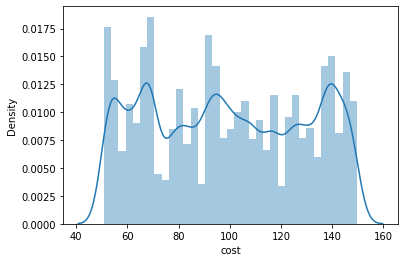

In [46]:
sns.distplot(data['cost']) 

In [47]:
data.corr() # Correlation of all the features

store_sales(in millions)  store_cost(in millions)  \
store_sales(in millions)                    1.000000                 0.953998   
store_cost(in millions)                     0.953998                 1.000000   
unit_sales(in millions)                     0.503315                 0.479941   
total_children                              0.083297                 0.079166   
avg_cars_at home(approx)                    0.004608                 0.002689   
num_children_at_home                        0.032475                 0.027346   
avg_cars_at home(approx).1                  0.004608                 0.002689   
SRP                                         0.832587                 0.795315   
gross_weight                                0.035065                 0.033306   
net_weight                                  0.032911                 0.031149   
recyclable_package                          0.034387                 0.030370   
low_fat                                    -0.006081                -0.006091   
units_per_case                             -0.010007                -0.009422   
store_sqft                                  0.016563                 0.018751   
grocery_sqft                                0.010675                 0.013046   
frozen_sqft                                 0.017386                 0.018666   
meat_sqft                                   0.017386                 0.018666   
coffee_bar                                 -0.029229                -0.027154   
video_store                                 0.019259                 0.019230   
salad_bar                                   0.031624                 0.033287   
prepared_food                               0.031624                 0.033287   
florist                                     0.030588                 0.030862   
cost                                       -0.004675                -0.004454   

                            unit_sales(in millions)  total_children  \
store_sales(in millions)                   0.503315        0.083297   
store_cost(in millions)                    0.479941        0.079166   
unit_sales(in millions)                    1.000000        0.163188   
total_children                             0.163188        1.000000   
avg_cars_at home(approx)                   0.023667        0.098110   
num_children_at_home                       0.066725        0.394709   
avg_cars_at home(approx).1                 0.023667        0.098110   
SRP                                       -0.002467        0.000658   
gross_weight                               0.001335       -0.000248   
net_weight                                 0.001023        0.000117   
recyclable_package                         0.001599        0.002794   
low_fat                                   -0.001129       -0.002824   
units_per_case                             0.000178        0.002390   
store_sqft                                 0.032962        0.000701   
grocery_sqft                               0.024863        0.018346   
frozen_sqft                                0.029414       -0.026638   
meat_sqft                                  0.029414       -0.026638   
coffee_bar                                -0.057633        0.002836   
video_store                                0.034996       -0.000591   
salad_bar                                  0.057878       -0.013764   
prepared_food                              0.057878       -0.013764   
florist                                    0.055885       -0.003361   
cost                                      -0.015015       -0.003900   

                            avg_cars_at home(approx)  num_children_at_home  \
store_sales(in millions)                    0.004608              0.032475   
store_cost(in millions)                     0.002689              0.027346   
unit_sales(in millions)                     0.023667              0.066725   
total_children                              0.098110              

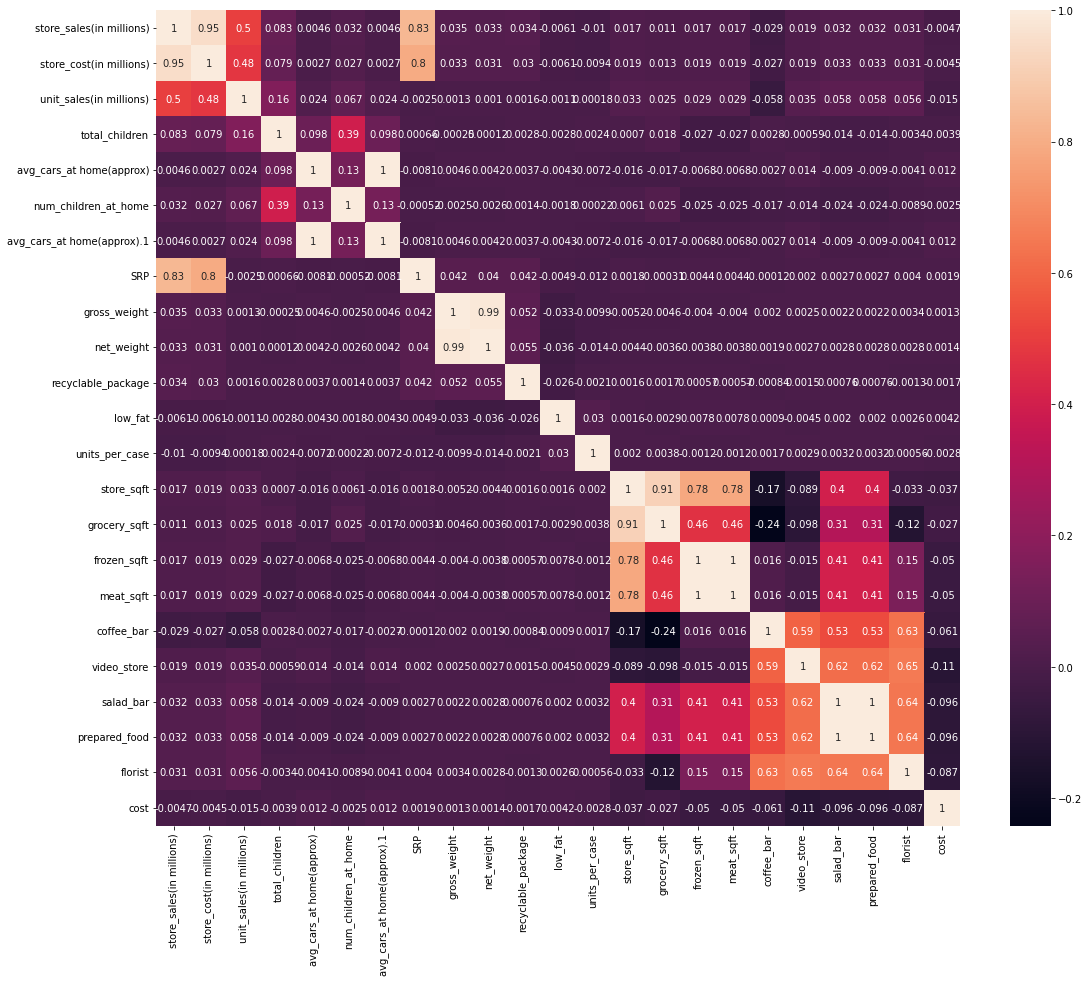

In [48]:
plt.figure(figsize=(18,15))
sns.heatmap(data=data.corr(), annot=True) # Correlation map of all the features - selecting the threshold 

#Converting Catogarical Data to Numerical Data

In [49]:
from sklearn.preprocessing import LabelEncoder
enc1 = LabelEncoder()
dfSample_transformed = dfSample.copy()
for item in data.iloc[:, :-1]:
  enc1.fit(data[item])
  data[item] = enc1.transform(data[item])
  dfSample_transformed[item] = enc1.transform(dfSample[item])

data

food_category  food_department  food_family  store_sales(in millions)  \
0                  4               12            1                        19   
1                  4               12            1                        14   
2                  4               12            1                         9   
3                  4               12            1                         9   
4                  4               12            1                        10   
...              ...              ...          ...                       ...   
60423             42                7            2                         6   
60424             42                7            2                         3   
60425             42                7            2                        14   
60426             42                7            2                        22   
60427             42                7            2                        25   

       store_cost(in millions)  unit_sales(in millions)  promotion_name  \
0                           18                        3               0   
1                           17                        2               6   
2                            8                        1              18   
3                            7                        1               6   
4                            9                        2              11   
...                        ...                      ...             ...   
60423                        8                        0              48   
60424                        2                        0              24   
60425                       16                        1              47   
60426                       17                        2              31   
60427                       28                        3              38   

       sales_country  marital_status  gender  ...  grocery_sqft  frozen_sqft  \
0                  2               0       0  ...             6           10   
1                  2               0       1  ...             6           10   
2                  2               1       0  ...             6           10   
3                  2               0       0  ...             6           10   
4                  2               0       1  ...             6           10   
...              ...             ...     ...  ...           ...          ...   
60423              2               0       0  ...             2            5   
60424              2               1       0  ...             2            5   
60425              2               0       1  ...             2            5   
60426              0               1       1  ...            12            4   
60427              0               1       0  ...            12            4   

       meat_sqft  coffee_bar  video_store  salad_bar  prepared_food  florist  \
0             10           1            1          1              1        1   
1             10           1            1          1              1        1   
2             10           1            1          1              1        1   
3             10           1            1          1              1        1   
4             10           1            1          1              1        1   
...          ...         ...          ...        ...            ...      ...   
60423          5           1            0          0              0        0   
60424          5           1            0          0              0        0   
60425          5           1            0          0              0        0   
60426          4           1            0          0              0        1   
60427          4           1            0          0              0        1   

       media_type    cost  
0               3  126.62  
1               3   59.86  
2               3   84.16  
3               5   95.78  
4               7   50.79  
...           ...     ...  
60423           5   95.25  

#Data Modelling

In [50]:
class RandomForestRegressor():
    def __init__(self, x, y, n_trees, n_features, sample_sz, depth=10, min_leaf=5):
        np.random.seed(41)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features
        print(self.n_features, "sha: ",x.shape[1])    
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf  = x, y, sample_sz, depth, min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        return DecisionTreeReg(self.x[idxs], self.y[idxs], self.n_features, f_idxs,
                    idxs=np.array(range(self.sample_sz)), depth = self.depth, min_leaf=self.min_leaf)
      #Ensemble Bagging Method  
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)
#Standard Deviation aggregrator for Decision Tree
def std_agg(cnt, s1, s2): return math.sqrt(abs((s2/cnt) - (s1/cnt)**2))

class DecisionTreeReg():
    def __init__(self, x, y, n_features, f_idxs, idxs, depth=10, min_leaf=5):
        self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
        self.depth = depth
        #print(f_idxs)
        #print(self.depth)
        self.n_features = n_features
        self.n, self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in self.f_idxs: self.find_better_split(i)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        self.lhs = DecisionTreeReg(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth-1, min_leaf=self.min_leaf)
        self.rhs = DecisionTreeReg(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth-1, min_leaf=self.min_leaf)

    def find_better_split(self, var_idx):
        x, y = self.x[self.idxs, var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y, sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt, rhs_sum, rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt, lhs_sum, lhs_sum2 = 0, 0., 0.

        for i in range(0, self.n - self.min_leaf - 1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i < self.min_leaf or xi == sort_x[i+1]:
                continue
#SD as the measure as a measure of information gain
            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std * lhs_cnt + rhs_std * rhs_cnt
            if curr_score < self.score: 
                self.var_idx, self.score, self.split = var_idx, curr_score, xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x[self.idxs, self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf') or self.depth <= 0 
    

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [51]:
X = data.iloc[:, :-1]
Y = pd.DataFrame(data.iloc[:, -1],columns=['cost'])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=42)

#display(type(X_train),type(Y_train))


In [52]:
#data=pd.concat([X_train,Y_train],axis=1)
rf = RandomForestRegressor(X_train.values, Y_train.values, n_features=X_train.shape[1], n_trees=5, sample_sz=15000, depth=15)

39 sha:  39


In [53]:
display(dfSample)
#display(dfSample_transformed)
dfSample_transformed['cost_predicted'] = rf.predict(dfSample_transformed.iloc[:, :-1].values)
display(dfSample_transformed) 

food_category food_department food_family  store_sales(in millions)  \
2000    Vegetables         Produce        Food                       2.3   
2001    Vegetables         Produce        Food                       1.0   
2002    Vegetables         Produce        Food                       0.9   
2003    Vegetables         Produce        Food                      -0.3   
2004    Vegetables         Produce        Food                       0.4   

      store_cost(in millions)  unit_sales(in millions)  \
2000                      3.0                      2.3   
2001                      0.7                      1.1   
2002                      0.4                     -0.1   
2003                     -0.1                     -1.3   
2004                      0.5                     -0.1   

              promotion_name sales_country marital_status gender  ...  \
2000            Bag Stuffers           USA              S      M  ...   
2001   Cash Register Lottery           USA              S      M  ...   
2002          Price Slashers           USA              S      M  ...   
2003  I Cant Believe It Sale           USA              S      M  ...   
2004          Price Slashers           USA              S      M  ...   

      grocery_sqft frozen_sqft meat_sqft coffee_bar video_store  salad_bar  \
2000          -0.1         0.1       0.1        1.0         1.0        1.0   
2001          -0.1         0.1       0.1        1.0         1.0        1.0   
2002          -0.1         0.1       0.1        1.0         1.0        1.0   
2003          -0.1         0.1       0.1        1.0         1.0        1.0   
2004          -0.1         0.1       0.1        1.0         1.0        1.0   

     prepared_food  florist               media_type    cost  
2000           1.0      1.0       Daily Paper, Radio  126.62  
2001           1.0      1.0   Daily Paper, Radio, TV   55.59  
2002           1.0      1.0  Sunday Paper, Radio, TV   54.11  
2003           1.0      1.0       Product Attachment   69.47  
2004           1.0      1.0  Sunday Paper, Radio, TV   54.11  

[5 rows x 40 columns]

food_category  food_department  food_family  store_sales(in millions)  \
2000             44               17            1                        40   
2001             44               17            1                        27   
2002             44               17            1                        26   
2003             44               17            1                        14   
2004             44               17            1                        21   

      store_cost(in millions)  unit_sales(in millions)  promotion_name  \
2000                       47                        4               0   
2001                       24                        3               6   
2002                       21                        2              27   
2003                       16                        1              19   
2004                       22                        2              27   

      sales_country  marital_status  gender  ...  frozen_sqft  meat_sqft  \
2000              2               1       1  ...           10         10   
2001              2               1       1  ...           10         10   
2002              2               1       1  ...           10         10   
2003              2               1       1  ...           10         10   
2004              2               1       1  ...           10         10   

      coffee_bar  video_store  salad_bar  prepared_food  florist  media_type  \
2000           1            1          1              1        1           3   
2001           1            1          1              1        1           4   
2002           1            1          1              1        1          11   
2003           1            1          1              1        1           6   
2004           1            1          1              1        1          11   

        cost  cost_predicted  
2000  126.62      126.620000  
2001   55.59       55.590000  
2002   54.11       54.110000  
2003   69.47       71.837229  
2004   54.11       54.110000  

[5 rows x 41 columns]

In [54]:
import warnings
warnings.filterwarnings(action='ignore')
Y_pred = pd.DataFrame(rf.predict(X_test.values), columns=['cost'])
Y_test = pd.DataFrame(Y_test.values, columns=['cost'])
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


Y_train_pred=rf.predict(X_train.values)
print('Train MSE',mean_squared_error(Y_train_pred,Y_train))
print('rmse:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('MSE on Test set :',mean_squared_error(Y_test,Y_pred))
print('R2 Score on Test set :',r2_score(Y_test,Y_pred))
print('MAE: ', mean_absolute_error(Y_test, Y_pred))
print("Standard Deviation of the Predicted Sample: " + str((np.sqrt(np.var(Y_pred.values)))))


Train MSE 16.812250429470982
rmse: 4.360157972412021
MSE on Test set : 19.01097754438811
R2 Score on Test set : 0.9790546849620163
MAE:  1.9768920861361559
Standard Deviation of the Predicted Sample: 28.74198278086501


In [55]:
print("Actual")
arr = []
res = []
count = 50
for item in Y_test.values:
    if count > 0:
        arr.append(item)
    count-=1
arr.sort()
print (arr)

print("\nPredicted")
count = 50
for item in Y_pred.values:
    if count > 0:
        res.append(item)
    count-=1
res.sort()
print (res)



Actual
[array([51.12]), array([53.29]), array([56.49]), array([57.52]), array([62.09]), array([62.09]), array([62.12]), array([62.27]), array([62.4]), array([64.76]), array([64.84]), array([65.7]), array([67.31]), array([68.97]), array([69.63]), array([71.51]), array([72.61]), array([75.76]), array([79.95]), array([83.26]), array([83.55]), array([86.21]), array([92.57]), array([94.79]), array([95.74]), array([98.81]), array([99.38]), array([104.41]), array([106.16]), array([109.09]), array([109.93]), array([110.17]), array([111.7]), array([112.52]), array([115.13]), array([117.4]), array([122.51]), array([123.61]), array([126.62]), array([128.2]), array([129.38]), array([129.5]), array([133.42]), array([133.42]), array([144.31]), array([145.41]), array([145.52]), array([145.6]), array([148.87]), array([149.08])]

Predicted
[array([51.12]), array([53.29]), array([57.52]), array([58.79686747]), array([62.09]), array([62.09]), array([62.12]), array([62.4]), array([64.76]), array([65.7]), 

#Actual vs Predicted Data

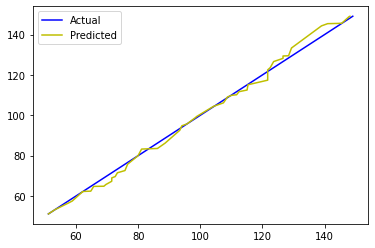

In [56]:
from matplotlib import pyplot as plt

plt.plot(arr, arr, label= 'Actual Values',color='b')

plt.plot(res, arr, label= 'Predicted Values',color='y')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()

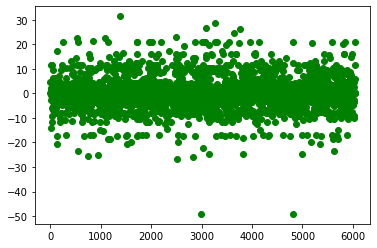

In [57]:
g=plt.plot(Y_test - Y_pred, marker='o', linestyle='',color='g')

In [58]:
y_test=Y_test.values
pred=Y_pred.values
display("Size of samples: " + str(len(y_test)))
#Variance check for two tailed test
display("Variance of Predicted Samples: " + str(np.var((pred))), "Variance of Ground Truth: " + str(np.var((y_test))))
display("Standard Deviation of the Predicted Sample: " + str((np.sqrt(np.var(pred)))))
#Ratio
display("Ratio to check for nearly equal Variance: " + str(np.var(pred)/np.var(y_test)))

'Size of samples: 6043'

'Variance of Predicted Samples: 826.1015741755407'

'Variance of Ground Truth: 907.6482024697293'

'Standard Deviation of the Predicted Sample: 28.74198278086501'

'Ratio to check for nearly equal Variance: 0.9101561286935858'

In [59]:
import scipy.stats as stats
#T-Test
#Equal Variance, hence equal_var = 'True'
tstat, t_pval = stats.ttest_ind(a=pred, b=y_test, equal_var=True)

display("T-Statistic: " + str(tstat.round(3)), "PValue: " + str(t_pval.round(3)))

'T-Statistic: [-0.025]'

'PValue: [0.98]'

In [60]:
from sklearn.ensemble import RandomForestRegressor as RdmForest
rf = RdmForest(n_estimators=10,random_state=0)
rf.fit(X_train, Y_train)
pred_val_sk = rf.predict(X_test)
tstat, t_pval = stats.ttest_ind(a=pred_val_sk, b=Y_test, equal_var=True)

display("T-Statistic: " + str(tstat.round(3)), "PValue: " + str(t_pval.round(3)))


print('rmse:', np.sqrt(mean_squared_error(Y_test, pred_val_sk)))
print('MSE on Test set :',mean_squared_error(Y_test,pred_val_sk))
print('R2 Score on Test set :',r2_score(Y_test,pred_val_sk))
print('MAE: ', mean_absolute_error(Y_test, pred_val_sk))


'T-Statistic: [0.015]'

'PValue: [0.988]'

rmse: 1.2699790176529828
MSE on Test set : 1.6128467052788351
R2 Score on Test set : 0.9982230486427558
MAE:  0.07756412377968679


R2 score  : 0.97905468 
RMSE score: 4.36015797 
MSE score : 19.0109775 
MAE score : 1.97689209 


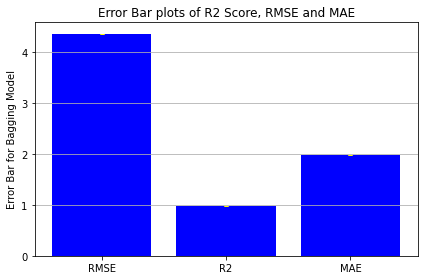

In [61]:
from numpy import absolute
scores_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
scores_mse = mean_squared_error(Y_test,Y_pred)
scores_r2 = r2_score(Y_test,Y_pred)
scores_mae = mean_absolute_error(Y_test, Y_pred)

scores_rmse = absolute(scores_rmse)
scores_mse = absolute(scores_mse)
scores_r2 = absolute(scores_r2)
scores_mae = absolute(scores_mae)

labels = ['RMSE', 'R2', 'MAE']
x_pos = np.arange(len(labels))
CTEs = [absolute(scores_rmse.mean()), absolute(scores_r2.mean()), absolute(scores_mae.mean())]
error = [absolute(scores_rmse.std()), absolute(scores_r2.std()), absolute(scores_mae.std())]
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=1.0,
       ecolor='yellow',
       capsize=2,
       color='blue')
ax.set_ylabel('Error Bar for Bagging Model')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Error Bar plots of R2 Score, RMSE and MAE')
ax.yaxis.grid(True)

#Print metric values
print('R2 score  : %.8f ' % (scores_r2.mean()))
print('RMSE score: %.8f ' % (scores_rmse.mean()))
print('MSE score : %.7f ' % (scores_mse.mean()))
print('MAE score : %.8f ' % (scores_mae.mean()))

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

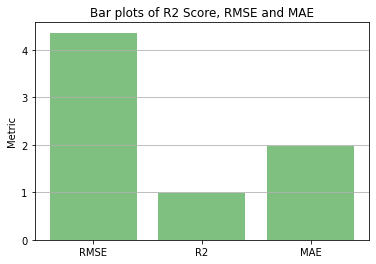

In [62]:
labels = ['RMSE', 'R2', 'MAE']
x_pos = np.arange(len(labels))
fig, ax = plt.subplots()
ax.bar(x_pos, [scores_rmse, scores_r2,scores_mae],
       align='center',
       alpha=0.5,
       ecolor='yellow',
       capsize=2,
       color='green')
ax.set_ylabel('Metric')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Bar plots of R2 Score, RMSE and MAE')
ax.yaxis.grid(True)